# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import nltk
from nltk import pos_tag
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.corpus import stopwords
import random
import string
import re
import matplotlib.pyplot as plt
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | A simple story with an unfor...
1,✅ Trip Verified | Flight was delayed due to t...
2,Not Verified | Fast and friendly check in (to...
3,✅ Trip Verified | I don't understand why Brit...
4,Not Verified | I'm sure that BA have graduall...


In [4]:
df.to_csv("BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

# Removing Trip Verification

In [5]:
rev=[]
for i in df['reviews'].values:
    rev.append(i.split("|")[1])
df['reviews']=rev

In [6]:
df.head()

,reviews
0,A simple story with an unfortunate outcome th...
1,Flight was delayed due to the inbound flight...
2,Fast and friendly check in (total contrast t...
3,I don't understand why British Airways is cl...
4,I'm sure that BA have gradually made their e...


# Data Preprocessing Steps
 
### Cleaning the text
### Tokenization
### POS Tagging
### Stopwords Removal
### Extraction of STEM Words

# Step 1: Cleaning the Text

In [7]:
def clean(text):
    text=re.sub('^[A-Za-z]+',' ',str(text))
    return text

df['reviews']=df['reviews'].apply(clean)

In [8]:
df.head()

,reviews
0,A simple story with an unfortunate outcome th...
1,Flight was delayed due to the inbound flight...
2,Fast and friendly check in (total contrast t...
3,I don't understand why British Airways is cl...
4,I'm sure that BA have gradually made their e...


# Step 2: Tokenization
### Tokenization is the process of breaking the text into smaller pieces called Tokens. It can be performed at sentences(sentence tokenization) or word level(word tokenization).

# Step 3: Enrichment – POS tagging
### Parts of Speech (POS) tagging is a process of converting each token into a tuple having the form (word, tag). POS tagging essential to preserve the context of the word and is essential for Lemmatization.

# Step 4: Stopwords removal
### Stopwords in English are words that carry very little useful information. We need to remove them as part of text preprocessing. nltk has a list of stopwords of every language.

# Step 5: Obtaining the stem words
### A stem is a part of a word responsible for its lexical meaning. The two popular techniques of obtaining the root/stem words are Stemming and Lemmatization.

### The key difference is Stemming often gives some meaningless root words as it simply chops off some characters in the end. Lemmatization gives meaningful root words, however, it requires POS tags of the words.

NLTK is a leading platform for building Python programs to work with human language data. 

It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along 
with a suite of text processing libraries for classification, tokenization, stemming, tagging, 
parsing, and semantic reasoning, wrappers for industrial-strength NLP libraries

In [9]:
stops=set(stopwords.words('english'))
punctuations=list(string.punctuation)
stops.update(punctuations)
lemmatizer=WordNetLemmatizer()

In [10]:
def get_simple_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [11]:
def clean_review(words):
    output_words=[]
    for w in words:
        if w.lower() not in stops:
            pos=pos_tag([w])
            clean_words=lemmatizer.lemmatize(w,pos=get_simple_pos(pos[0][1]))
            output_words.append(clean_words.lower())
    return output_words

In [12]:
text_doc=[]
for i in df['reviews'].values:
    text_doc.append(' '.join(clean_review(i.split())))
df['Clean_Review']=text_doc

In [13]:
df.head()

,reviews,Clean_Review
0,A simple story with an unfortunate outcome th...,simple story unfortunate outcome really could ...
1,Flight was delayed due to the inbound flight...,flight delayed due inbound flight arrive late....
2,Fast and friendly check in (total contrast t...,fast friendly check (total contrast gatwick). ...
3,I don't understand why British Airways is cl...,understand british airways classify 4 star air...
4,I'm sure that BA have gradually made their e...,i'm sure ba gradually make economy experience ...


# Sentiment Analysis using VADER
### VADER stands for Valence Aware Dictionary and Sentiment Reasoner.

### Vader sentiment not only tells if the statement is positive or negative along with the intensity of emotion.


In [14]:
analyzer = SentimentIntensityAnalyzer()

def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Clean_Review'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,Clean_Review,Sentiment,Analysis
0,A simple story with an unfortunate outcome th...,simple story unfortunate outcome really could ...,0.8908,Positive
1,Flight was delayed due to the inbound flight...,flight delayed due inbound flight arrive late....,-0.3612,Negative
2,Fast and friendly check in (total contrast t...,fast friendly check (total contrast gatwick). ...,0.9798,Positive
3,I don't understand why British Airways is cl...,understand british airways classify 4 star air...,0.9168,Positive
4,I'm sure that BA have gradually made their e...,i'm sure ba gradually make economy experience ...,0.7703,Positive


In [15]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Positive    495
Negative    391
Neutral     114
Name: Analysis, dtype: int64

# Visual Representation

([<matplotlib.patches.Wedge at 0x1875ab59550>,
 [Text(0.01727803256672648, 1.0998642959886566, 'Positive'),
  Text(-0.40172189896342486, -1.0240212477742932, 'Negative'),
  Text(1.2643423691745355, -0.47322127330681485, 'Neutral')],
 [Text(0.009424381400032626, 0.5999259796301762, '49.5%'),
  Text(-0.21912103579823172, -0.5585570442405234, '39.1%'),
  Text(0.7960674176284112, -0.29795413504503154, '11.4%')])

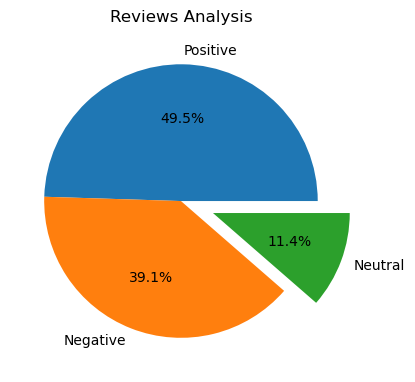

In [16]:
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

In [17]:
df.to_csv("BA_reviews.csv")

# Wordcloud
### Word Cloud or Tag Clouds is a visualization technique for texts that are natively used for visualizing the tags or keywords from the websites

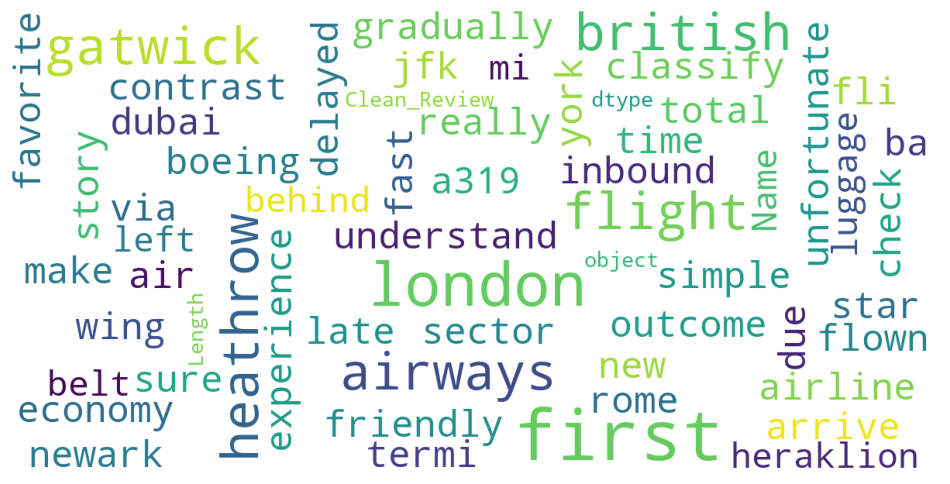

In [18]:
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df['Clean_Review'])

# Word Frequency

In [19]:
dic={}
for i in df['Clean_Review'].values:
    for j in i.split():
        dic[j]=dic.get(j,0)+1

In [20]:
xaxis=[]
yaxis=[]

for i in dic.keys():
    xaxis.append(i)
    yaxis.append(dic[i])
np_xaxis=np.array(xaxis)
np_yaxis=np.array(yaxis)

np_xaxis=np_xaxis[np.argsort(np_yaxis)]
np_yaxis=np.sort(np_yaxis)

np_xaxis=np_xaxis[len(np_xaxis)-1:len(np_xaxis)-1-10:-1]
np_yaxis=np_yaxis[len(np_yaxis)-1:len(np_yaxis)-1-10:-1]

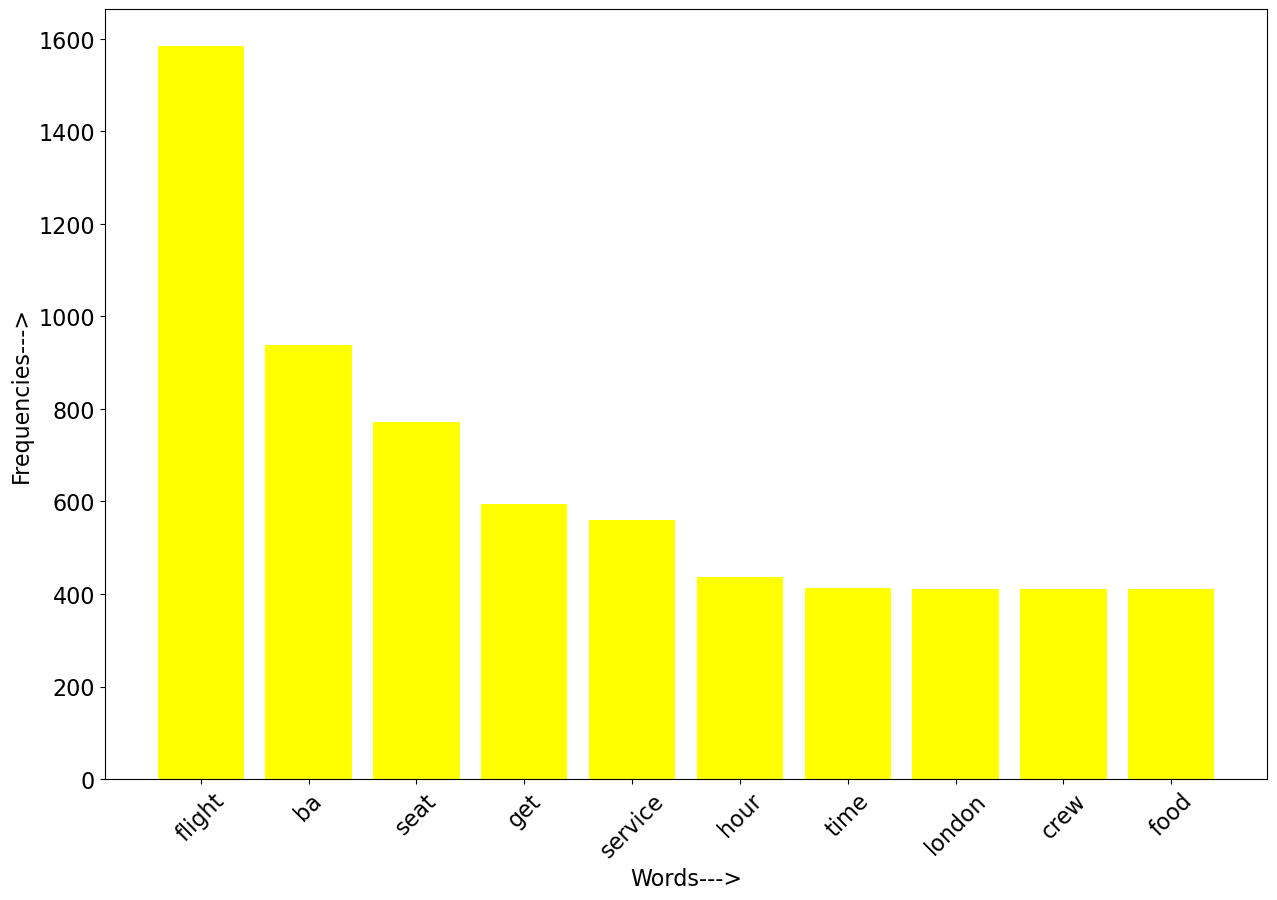

In [22]:
plt.subplots(figsize=(15, 10))
plt.bar(np_xaxis, np_yaxis, color='yellow')
plt.xticks(rotation=45, size=16)
plt.xlabel('Words--->', size=16)
plt.ylabel('Frequencies--->', size=16)
plt.yticks(size=16)
plt.show()